## Russian film distribution research

### Step 1. Let's open the data files and merge them into one dataframe.

Let's merge the data in such a way that all objects from the `mkrf_movies` dataset are included in the resulting dataframe.

#### Description of the project
**The customer of this research** is the Ministry of Culture of the Russian Federation.
* It is necessary to study the Russian film distribution market and identify current trends.
* Pay attention to films that have received government support.
* Answer the question of how interesting such films are to the viewer.
* Source of information - open data on the portal of the Ministry of Culture.
* The data set contains information about distribution certificates, box office and government support for films, as well as information from the KinoPoisk website.

#### Description of data
The **mkrf_movies** table contains information from the rental license registry.
One film can have several distribution certificates.
* `title` - movie title;
* `puNumber` — rental certificate number;
* `show_start_date` - movie premiere date;
* `type` - movie type;
* `film_studio` - production studio;
* `production_country` - country of origin;
* `director` — director;
* `producer` - producer;
* `age_restriction` - age category;
* `refundable_support` — amount of state support refundable funds;
* `nonrefundable_support` - the amount of non-refundable state support funds;
* `financing_source` - source of government funding;
* `budget` - the total budget of the movie;
* `ratings` — movie rating on KinoPoisk;
* `genres` is the genre of the movie.

**Note** the `budget` column already includes full government support.
The data in this column is only for those films that received government support.

The **mkrf_shows** table contains information about movie screenings in Russian cinemas.
* `puNumber` — rental certificate number;
* `box_office` — fees in rubles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/mkrf_movies.csv') 
df1 = pd.read_csv('/datasets/mkrf_shows.csv') 

In [3]:
print(df['puNumber'].dtypes)
print(df1['puNumber'].dtypes)

object
int64


In [4]:
df[df['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In order to add the values of one data set to another, we need to convert this column to a single type, it is most logical to convert this column to an integer type - this is a number, but there is a value in the `puNumber` column of the **df** table **`нет`** and this creates an additional step for us (*since we will not translate the string into a number with all our desire*).

Therefore, we first translate into a string, connect, and then translate into an integer type.

In [5]:
df1['puNumber'] = df1['puNumber'].astype('str')
df = df.merge(df1, how = 'left', on = 'puNumber')

In [6]:
df['box_office'].isna().mean()

0.5781458722949506

Only **57%** of the entries in the first array have `fee` values.
Let's look at the first lines of the received dataframe, where `box_office` did not pull up.
It looks strange: there is a rental - there are no fees.

I propose to conduct further research on this issue in the paragraph **Data preprocessing**

In [7]:
df[df['box_office'].isna()].head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


**Conclusion**
- in this paragraph, we read 2 arrays and combined them together
- note that the attribute `box_office` could not be pulled up to 57% of the total volume of the table *datasets/mkrf_movies.csv*
- `puNumber` was converted to a string as a temporary solution, we will deal with data types in the next paragraph

### Step 2. Data preprocessing

#### Step 2.1. Checking Data Types

- Check the data types in the dataframe and convert them where necessary.

Now let's see what kind of data we have

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [9]:
df[df['budget'].isna() == False].head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0
1498,Невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5


It is most logical to make the following conversions with data types:
* change type to **int** *(quantitative integer values)* - `puNumber`, `box_office`, `refundable_support`, `nonrefundable_support`, `budget`
* change type to **float** *(quantitative real values)* - `ratings`
* change type to **datetime** *(dates)* - `show_start_date`

**Explanation**
* `box_office`, `refundable_support`, `nonrefundable_support`, `budget` - the indicators refer to the budgets of films in rubles, it is unlikely that anyone will be interested in the values after the comma (`box_office`), it is more convenient and correct to translate the variables into **int* *
* `ratings` is a rating and it is in this variable that the decimal point is important - the column needs the type **float**
* `show_start_date` - everything is clear here, this is the rental date, you need to present the variable as ***YYYY-MM-DD*** (for this we cut the date using the *dt.floor* method), type **datetime**

For training, I will carry out type conversion by creating a reference dictionary, and I will carry out the conversion itself through a function call (I don’t think that this is done in practice, but as part of training it will be useful)

The array has data filling errors that can prevent us from changing data types:
* `puNumber` - "нет"
* `ratings` - part of the data is filled with ratings with the *%* sign, while the Kinopoisk scale is 10 points (checked on the site https://www.kinopoisk.ru/lists/top250/?tab=all)
* `box_office` - round to the nearest integer so that there are no errors with translation to **int**

In [10]:
df['puNumber'] = df['puNumber'].replace('нет', np.nan).astype(np.float64)
df['ratings']  = df['ratings'].str.strip('%')
df['box_office'] = df['box_office'].round(0)

In [11]:
dict_param = {
              'Int64': ['puNumber', 'box_office', 'refundable_support', 'nonrefundable_support', 'budget'], 
              'float64': ['ratings'],
              'Datetime': ['show_start_date']
             }

In [12]:
def new_tps(data ,prm):
    for i in prm:
        if i != 'Datetime':
            data[prm.get(i)] = data[prm.get(i)].astype(i)
        elif i == 'Datetime':
            for z in prm.get(i):
                data[z] = pd.to_datetime(data[z], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.floor('1D')
                
    return data

In [13]:
df = new_tps(df, dict_param)

**Check:**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7485 non-null   Int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    Int64         
 10  nonrefundable_support  332 non-null    Int64         
 11  budget                 332 non-null    Int64         
 12  financing_source       332 non-null    object        
 13  rat

Now it is important not to forget about 3-digit ratings, which used to have a% sign,
I really don't like **loc/iloc** and I really like **sql-like** expressions

In [15]:
len(df[df['ratings'] > 10])

29

In [16]:
df['ratings']  = np.where(df['ratings'] > 10, np.nan , df['ratings'])

Let's check:

In [17]:
len(df[df['ratings'] > 10])

0

**Conclusion**
- We read the final dataframe and looked at its composition: **7486** rows, **16** columns
- Converted formats to more logical ones and explained their logic
- To convert formats, we wrote a function **new_tps**
- Conducted type conversions, we observe gaps in part of the pillars, we will deal with them in the next paragraph

#### Step 2.2. Let's study the gaps in the dataframe

- We will explain why we filled in the gaps in a certain way or why we will not do this.

Let's display the percentage of gaps in descending order, from the largest to the smallest:

In [18]:
empy_lst = ['puNumber','film_studio','production_country','director','producer',
            'refundable_support','nonrefundable_support','budget','financing_source',
            'ratings','genres','box_office']

In [19]:
df.isna().mean().sort_values(ascending=False).apply('{:.2%}'.format)

refundable_support       95.57%
nonrefundable_support    95.57%
budget                   95.57%
financing_source         95.57%
box_office               57.81%
ratings                  13.30%
genres                   13.04%
producer                  7.59%
film_studio               0.24%
director                  0.12%
production_country        0.03%
puNumber                  0.01%
title                     0.00%
show_start_date           0.00%
type                      0.00%
age_restriction           0.00%
dtype: object

How much data was added into df from df1:

In [20]:
df['box_office'].notna().sum()

3158

How much data is in df1 in general:

In [21]:
len(df1)

3158

We have gaps in 12 columns out of 16, at first glance, scary.
Let's see what gaps we have and whether they can be filled:

- `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` I selected these parameters in a group, since the share of passes for them is maximum and the same, the meaning of these indicators is to tell us about the state. support of films and efficient use of raised funds, obviously, a group of these fields should not be filled in for the entire data array, gaps do not need to be replaced
- `box_office` - fee data, there are not many of them, but if there is no fee data, we cannot invent it.
- `ratings` - data about the rating of the film, the gap in the indicator is similar to the previous parameter, despite the fact that we cannot average and fill in the gaps - this is not possible.
- `genres`, `film_studio`, `producer`, `director` are categorical variables, we will not be able to process gaps "manually" quickly and efficiently, we have no other sources of information on the assignment
- `puNumber` - there is one single gap here, previously it was filled with the value "none"

Perhaps the only field that we can fill in on our own is `production_country`, there are only two gaps and the data can be googled or guessed by the year of production.

In [22]:
df[df['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.2,"детский,комедия",194527
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.0,"мультфильм,комедия",<NA>


In [23]:
df['production_country'] = df['production_country'].fillna('Россия')

**Conclusion:**
- when filling in the gaps, it is very important not to "invent" the data, so that later you do not draw conclusions based on synthetic information about what is not there
- omissions in the group columns `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` are not actually an error, since not all films receive state. financing
- it is possible that some of the gaps are caused by duplicates (when for a movie with the same name the columns are filled in differently or with gaps) - the reason for this problem is a technical error when saving data to the database
- our current skills do not allow us to write a parser to collect additional. information from open sources (for example, from Kinopoisk), so I propose to leave almost all the gaps blank without exception

#### Step 2.3. Examining duplicates in a dataframe
- Check if there are duplicates in the data. Let us describe the reasons that could affect the appearance of duplicates.

Check the file for obvious duplicates (when all parameters in two different lines of the file are filled in the same way)

In [24]:
df.duplicated().sum()

0

There are not obvious duplicates.

The essence of our table is the movie that was released.
We need to check:
- are there any repetitions in the ID of the rental certificate
- are there any repetitions in the titles of films in the table, because a film cannot be released several times, unless the ID of its rental certificate changes (it is rather difficult to imagine this).

**Duplicate Rental ID**

In [25]:
df['puNumber'].value_counts().to_frame().query('puNumber > 1')

,puNumber
221054410,2
221154310,2


These are duplicate rental certificates.  
Let's take a look at the movie data.

In [26]:
df.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.4,"комедия,криминал",<NA>
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,6.8,"комедия,криминал",<NA>


Specifically, this case looks like a technical error.  
The data doubled due to the incorrect recording of the film's title, and a different rating was attracted to them.  
Director Harold Ramis does not have a film "Analyze That!"  
Let's delete the line where the rating is lower, and correct the typos.

In [27]:
df = df.drop([5068])

In [28]:
df['director'] = df['director'].replace('ХЭрольд Рэмис','Гарольд Реймис')

In [29]:
df = df.reset_index(drop = True)

In [30]:
df.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,Гарольд Реймис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.4,"комедия,криминал",<NA>


Consider the second case of repeating the rental certificate ID:

In [31]:
df.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.0,"мелодрама,комедия",<NA>
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"драма,мелодрама,история",<NA>


We will not delete anything here, because for some reason, the IDs of the rental certificates are the same (I suspect that this is a technical error).  
Information on fees not by ID was not pulled up, so here we were "lucky"

**Next, consider a situation where movie titles are repeated:**

In [32]:
df['title'].value_counts().to_frame().query('title > 1').reset_index()

,index,title
0,День святого Валентина_,5
1,Белоснежка и охотник,4
2,Химера,4
3,Рапунцель: Запутанная история,4
4,Кошмар на улице Вязов /Фильм ужасов/,4
...,...,...
553,Рожденные на воле 3D,2
554,Властелин колец: Возвращение короля /По произв...,2
555,Под ветвями боярышника,2
556,Властелин колец: Две крепости /По произведению...,2


In [33]:
df['title'].value_counts().to_frame().query('title > 1').reset_index()['title'].sum()

1272

In [34]:
df['title'].duplicated().sum()

714

**This is how many films with the same titles are in our table**

In [35]:
nms_dbl = df['title'].value_counts().to_frame().query('title > 1').reset_index()
nms_dbl = nms_dbl['index']
nms_dbl.columns = ['title']
nms_dbl.head(1)

0    День святого Валентина_
Name: index, dtype: object

This was unexpected, a film can indeed have several unique rental IDs.
Let's take a closer look at an example.
It can be seen that the film was simply released on different dates, which is why it received several rental certificates.

In [36]:
df[df['title'] == 'Красавчик-2']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
341,Красавчик-2,221011215,2015-04-03,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.1,"мелодрама,комедия",<NA>
4357,Красавчик-2,221060010,2010-05-12,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.1,"мелодрама,комедия",<NA>
4387,Красавчик-2,121006110,2010-03-30,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.1,"мелодрама,комедия",<NA>
4615,Красавчик-2,221161610,2010-12-17,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.1,"мелодрама,комедия",<NA>


And here you can stop, provided that all other signs are filled in the same way.  
But what if the rating for different IDs is filled in differently or there are gaps somewhere.

In [37]:
df_dbl = df.fillna(-1).query('''title in @nms_dbl''').groupby("title")\
   .agg({"puNumber": 'count', "ratings": pd.Series.nunique, "genres": pd.Series.nunique,
         "type": pd.Series.nunique, "film_studio": pd.Series.nunique,
         "production_country": pd.Series.nunique, "director": pd.Series.nunique,
         "producer": pd.Series.nunique, "age_restriction": pd.Series.nunique,     
        }).reset_index().query('''ratings > 1 or genres > 1 or type > 1 or film_studio > 1\
or production_country > 1 or director > 1 or producer > 1 or  age_restriction > 1''')

In [38]:
df_dbl.head()

,title,puNumber,ratings,genres,type,film_studio,production_country,director,producer,age_restriction
13,Альдабра: Путешествие по таинственному острову,2,1,1,1,2,1,1,2,1
18,Аниматор,2,1,1,1,2,1,1,1,1
32,Безумный Макс: Дорога ярости,2,1,1,2,2,2,1,2,2
42,Большая игра,2,1,1,1,2,2,2,2,2
51,В тихом омуте,2,1,1,2,2,2,2,2,2


In [39]:
df_dbl['ratings'].unique()

array([1])

Excellent, the values are not duplicated with the rating, however, according to other signs, this is not the case - the values multiply.

In [40]:
df[df['title'] == 'Безумный Макс: Дорога ярости']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2561,Безумный Макс: Дорога ярости,121009615,2015-04-27,Художественный,"Кеннеди Миллер Продакшнз, Виллидж Роадшоу Пикч...",США - Австралия,Джордж Миллер,"Джордж Миллер, Дуг Митчел",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.8,"боевик,фантастика,приключения",650165994
7312,Безумный Макс: Дорога ярости,121030019,2019-12-06,Художественный,Уорнер Бразерс Пикчерс,"Австралия, США",Джордж Миллер,"Джордж Миллер, Даг Митчелл, Брюс Берман",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.8,"боевик,фантастика,приключения",<NA>


The same film, the fields `production_country`, `film_studio`, `producer`, `age_restriction` (I can believe that the age limit is different in different rentals)

Of course, we could write a function and replace the categorical fields in **1272** lines with 1 common value.
But the problem is that the title of the movie is not the best sign for collapsing duplicates.
An example is below, it's funny that here the films have the same rating.

In [41]:
df[df['title'] == 'Вторжение']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5429,Вторжение,124002417,2017-08-01,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,5.7,"фантастика,боевик",<NA>
7473,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",<NA>


**Conclusion:**
- There are no obvious duplicates in our dataset
- 2 pairs of repetitions with the same rental ID were found in the sample, 1 ID was deleted (*221054410*).
The remaining two identical IDs can be considered a technical error (*221154310*)
- **1272** repetitions in movie titles were found in the data set, the reason for the repetitions is the presence of several rental certificates (the films were released in cinemas several times with an interval)
It is important to note that some of the fields within the same film in several screenings may differ in categorical variables, which would be great to fix, this task is made more difficult by the fact that the titles of absolutely early films can be the same

#### Step 2.4. Learn categorical meanings

- See what common problem occurs in almost all categorical columns;
- Correct the problematic values in the `type` field.

In [42]:
lst_obj = df.select_dtypes(include=[object]).columns.tolist()

In [43]:
for i in lst_obj:
    print(i, len(df[i].unique()))

title 6771
type 8
film_studio 5490
production_country 950
director 4811
producer 5349
age_restriction 5
financing_source 4
genres 743


The problem with categorical variables begins if the film was created in several countries, by several producers and has several genres - the order of writing these several titles may be different, for a person this is not critical, for the database and analysis these are two different values.
It remains to be hoped that this will not be crucial for data analysis (or I will figure out how to get around this limitation)
Below I output everything in a loop so as not to repeat the same thing many times.

In [44]:
for i in lst_obj[1:]:
    display(df[i].value_counts().to_frame().sort_values(by = i, ascending = False))

,type
Художественный,4519
Художественный,1389
Анимационный,828
Прочие,406
Документальный,288
Научно-популярный,53
Анимационный,1
Музыкально-развлекательный,1


,film_studio
"Киностудия ""Мосфильм""",341
"ООО ""Мульт в кино""",57
Анимаккорд Лтд,23
"ООО ""Мульт в кино""",18
"ФГУП ""ТПО ""Киностудия ""Союзмультфильм""",16
...,...
Игнатов Генрих Генрихович,1
"ООО ""РЕНОВАЦИО интертейнмент""",1
"Имадж Тен, Лаурель Групп, Маркет Скьяр Продакшнз",1
"Блайндинг Эйдж Пикчерз, Блюмхаус Продакшнз",1


,production_country
США,2171
Россия,1823
СССР,347
Франция,301
Великобритания,257
...,...
Испания - Швейцария - Великобритания - Германия - Новая Зеландия - Нидерланды - Канада,1
Киргизия-Россия,1
"Великобритания, США, Испания",1
Италия - Швейцария - Германия,1


,director
О.Семёнова,47
Стивен Содерберг,17
Д.Червяцов,17
Ридли Скотт,16
Тиль Швайгер,14
...,...
"Майкл Митчелл, Триша Гам",1
Карстен Килерих,1
Силвейн Уайт,1
Карлус Диегос,1


,producer
П.Смирнов,67
"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",28
С.Сельянов,18
"Д.Ловейко, О.Кузовков",17
Тони Майерс,11
...,...
"Дэн Ли, Рой Ли, Барбара Мускетти",1
"Кэролайн Арагон, Винс Джоливетт, Майкл Мендельсон",1
"Т.Бидеган, Д.Брафф, Б.Голдберг, Б.де Ганай, О.Декок, Д.Кеннелли, Д.Э.Кертис, М.Кэннон, Д.Мегхерби, Д.Печберти, А.Рис, Х.Л.Эллис",1
"Д.Паклин, Т.Ивашкина",1


,age_restriction
«16+» - для детей старше 16 лет,2851
«18+» - запрещено для детей,1605
«12+» - для детей старше 12 лет,1592
«0+» - для любой зрительской аудитории,811
«6+» - для детей старше 6 лет,626


,financing_source
Министерство культуры,164
Фонд кино,146
"Министерство культуры, Фонд кино",22


,genres
драма,476
комедия,352
"мелодрама,комедия",222
"драма,мелодрама,комедия",189
"драма,мелодрама",183
...,...
"мелодрама,музыка,драма",1
"детектив,фантастика,триллер",1
"драма,мелодрама,триллер",1
"приключения,фантастика,драма",1


Fix the `type` field

In [45]:
df['type'] = df['type'].str.strip()

In [46]:
display(df['type'].value_counts().to_frame().sort_values(by = 'type', ascending = False))

,type
Художественный,5908
Анимационный,829
Прочие,406
Документальный,288
Научно-популярный,53
Музыкально-развлекательный,1


**Conclusion:**
- `type` field - fixed
- the problem of categorical variables - identified

#### Step 2.5. Check quantitative values

- Check if any suspicious data is found in such columns. What is the best way to deal with such data?

Quantity Columns (except ID):
- `refundable_support`, `nonrefundable_support`, `budget` - values are related
- `ratings` - rating
- `box_office` - movie fees      

In [47]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
puNumber,7484.00,135185115.38,38342636.24,1811096.00,112025093.00,121015464.50,124003313.25,231001111.00
refundable_support,332.00,11864457.83,24916555.26,0.00,0.00,0.00,15000000.00,180000000.00
nonrefundable_support,332.00,48980988.89,59980117.92,0.00,25000000.00,30000000.00,40375000.00,400000000.00
budget,332.00,127229716.68,188588333.12,0.00,42000000.00,68649916.00,141985319.50,2305074303.00
ratings,6489.00,6.48,1.10,1.00,5.90,6.60,7.20,9.20
box_office,3158.00,76478696.16,240353122.83,0.00,86239.00,2327987.50,23979671.25,3073568691.00


Let's look at the maximum values of **ranking** and **fees**

In [49]:
df[df['ratings'] == 9.2]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1471,Друзья друзей,111014513,2013-12-19,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,9.20,"комедия,мелодрама",27780


Who collected the maximum amount at the box office? (300 billion rubles)

In [50]:
df[df['box_office'] == 3073568691.00]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7455,Холоп,111021719,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000,35000000,160000000,Фонд кино,6.80,комедия,3073568691


Yandex says that the real charges are 3 billion, the figure is overestimated by 100 times.

Let's build box plots for **rating** and **fee**, estimate how many anomalous values are in the sample

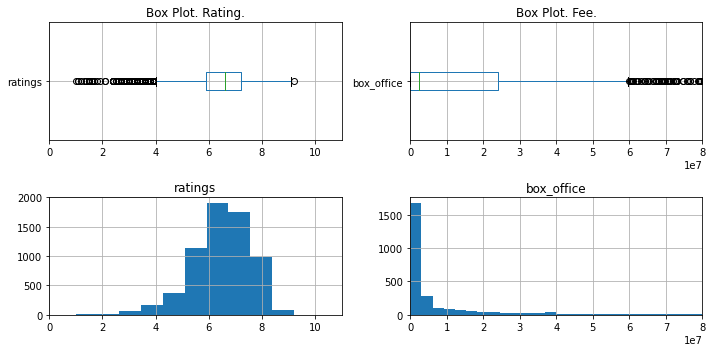

In [51]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))


axes[0,0].set_xlim([0, 11])
axes[0,1].set_xlim([0, 80000000])

axes[1,0].set_xlim([0, 11])
axes[1,1].set_xlim([0, 80000000])


axes[0,0].title.set_text("Box Plot. Rating.")
axes[0,1].title.set_text("Box Plot. Fee.")
axes[1,0].title.set_text("Histogram. Rating.")
axes[1,1].title.set_text("Histogram. Fee.")


df.boxplot(column = ['ratings'], vert = False, ax = axes[0,0])
df.boxplot(column = ['box_office'],  vert = False, ax = axes[0,1])
df.hist(column = ['ratings'], bins = 10, ax = axes[1,0])
df.hist(column = ['box_office'], bins = 1000, ax = axes[1,1])

fig.tight_layout()

In [52]:
len(df[df['box_office'] <= 500000])*100/len(df[df['box_office'] > 0])

34.39693682195278

In [53]:
len(df[df['ratings'] < 8])*100/len(df[df['ratings'] > 0])

93.95900755124056

- a third of all films (**35%**), of those for which we have information, grossed < 0.5 million rubles at the box office (**looks suspicious**), this could be due to a technical error if most of the box office receipts < 500 thousand at the latest dates.
- **93%** of all films with a rating > 0 have a rating less than 8 (here the data looks quite plausible). The `rating` distribution profile is similar to the normal distribution

I propose to see how many outliers we have by `fee` for this, we will determine the boundaries of the box plot

In [54]:
delta_bx = (df['box_office'].quantile(q = 0.75) - df['box_office'].quantile(q = 0.25))

max_bx = df['box_office'].quantile(q = 0.75) + 1.5*delta_bx

if df['box_office'].quantile(q = 0.25) - 1.5*delta_bx > 0:
    min_bx = df['box_office'].quantile(q = 0.25) - 1.5*delta_bx
else:
    min_bx = 0
    
print(max_bx, min_bx)

59819819.625 0


In [55]:
print('Outliers by fees', len(df[df['box_office'] > max_bx]))
print('Share of all completed fees', '{:.1%}'.format(len(df[df['box_office'] > max_bx])/len(df[df['box_office'] > 0])))

Outliers by fees 549
Share of all completed fees 17.5%


At the moment I have no idea what to do with the fee column.
- we cannot remove outliers - we will lose too much
- adjusting the values is also not the best way

The easiest way at this stage is to create an additional column and designate extreme values by 1, and all others by 0

In [56]:
df['flg_bd_box_office'] = np.where(df['box_office'] > max_bx, 1 , 0)

Check

In [57]:
len(df[df['flg_bd_box_office'] > 0])

549

**refundable_support, nonrefundable_support, budget**  

From the condition, we know that the **budget** field is filled only for state. financing, it is obvious that the budget of the film cannot be less than the sum of repayable and non-refundable funds (the film must also have its own budget, in addition to state support)

Found **17** entries where the total budget is **0**, total films with filled fields `refundable_support` and `nonrefundable_support` - **332** (i.e. 17 entries - **5%** data)
Since the share of lines with an unfilled budget is small and amounts to 5% of all films with state funding, I propose not to take these records into account in the analysis.

In [58]:
len(df[(df['refundable_support'] + df['nonrefundable_support'] > df['budget'])])

17

In [59]:
len(df[(df['refundable_support'] + df['nonrefundable_support'] > 0)])

332

In [60]:
df[(df['refundable_support'] + df['nonrefundable_support'] > df['budget'])].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,flg_bd_box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016,0
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.60,драма,446163511,1
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.80,"боевик,драма,криминал",196572438,1
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.20,"комедия,фэнтези",67418975,1
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551,1


**Check:**  
Are there any pictures where the amount of repayable and non-refundable state funds. support / film budget > **80%**
So we can see if we can change the value of `budget` to the amount of `refundable_support` + `nonrefundable_support`

In [61]:
df[(((df['refundable_support'] + df['nonrefundable_support']) / df['budget']) > 0.8)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,flg_bd_box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016,0
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.60,драма,446163511,1
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.80,"боевик,драма,криминал",196572438,1
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.20,"комедия,фэнтези",67418975,1
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551,1
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6.30,"комедия,драма",1957739,0
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5.10,"комедия,мелодрама",72937783,1
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4.30,комедия,15362931,0
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.30,"комедия,мелодрама",70299052,1
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,5.60,фантастика,1038321489,1


In [62]:
df[(df['refundable_support'] + df['nonrefundable_support'] == df['budget'])].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,flg_bd_box_office


well, replace 0 values of the `budget` column with the sum of `refundable_support` + `nonrefundable_support` **not allowed**

**Replacing lines with budget = 0 with empty lines**  

So that the data does not interfere with us in the future, I propose to reset the values.

In [63]:
id_bdg = df[(df['refundable_support'] + df['nonrefundable_support'] > df['budget'])]['puNumber'].to_list()

In [64]:
len(id_bdg)

17

In [66]:
df['refundable_support'] = np.where(df.budget == 0,  np.nan , df['refundable_support'])
df['nonrefundable_support'] = np.where(df.budget == 0,  np.nan , df['nonrefundable_support'])
df['budget'] = np.where(df.budget == 0,  np.nan , df['budget'])

Replacement check:

In [67]:
df[df['puNumber'].isin(id_bdg)][['budget','refundable_support','nonrefundable_support']].head(3)

,budget,refundable_support,nonrefundable_support
2053,NaN,NaN,NaN
2058,NaN,NaN,NaN
2472,NaN,NaN,NaN


**Conclusion**
- `ratings` - the distribution has a profile similar to normal, I have no comments on the indicator
- `box_office` - for **35%** of all completed rows, fees do not exceed **0.5** million rubles, separately created a flag column `flg_bd_box_office` to highlight outliers by indicator
- complex `refundable_support`, `nonrefundable_support`, `budget` for **5%** of all completed records, the value of the total budget turned out to be incorrect (less than the amount of reimbursable and non-refundable state support), it was decided to reset the values of all three variables ( volume does not seem critical)

#### Step 2.6. Add new columns

- Create a column with information about the rental year. Select the year from the movie's release date.

Nothing complicated, previously converted the column into a date.

In [68]:
df['year_start'] = (df['show_start_date']).dt.year

- Create two columns: with the first and last name of the main director and the main genre of the film. The columns will include the first values from the list of directors and genres, respectively.

In [69]:
lst_new_clmn = {'genres': 'main_genre', 
                'director': 'main_director'}

In [70]:
def new_clmn_nms(dct, data = df, sep = ','):
    for i in dct:
        data[dct.get(i)] = data[i].str.split(sep ,expand=True)[0] 
    return data

In [71]:
df = new_clmn_nms(lst_new_clmn, df)

Show new columns

In [72]:
for i in lst_new_clmn:
    display(df[lst_new_clmn.get(i)].value_counts().to_frame().sort_values(by = lst_new_clmn.get(i), ascending = False))

,main_genre
драма,1688
комедия,696
боевик,617
ужасы,573
мультфильм,538
триллер,521
фантастика,410
мелодрама,383
фэнтези,358
документальный,219


,main_director
О.Семёнова,47
Стивен Содерберг,17
Д.Червяцов,17
Ридли Скотт,16
Тиль Швайгер,14
...,...
А.Злобин,1
Н.Антонов,1
Карлус Диегос,1
Е.Дворецкая (псевдоним - Елена Лобачева-Дворецкая),1


- Calculate what proportion of the total budget of the film is government support.

In [73]:
df['part_gov_help'] = (df['nonrefundable_support'] + df['refundable_support'])*100/df['budget']

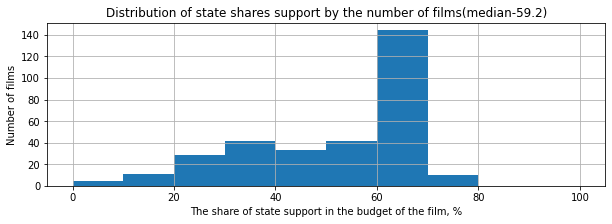

In [74]:
df['part_gov_help'].hist(bins = 10, range = (0,100), figsize=(10, 3))
plt.title('Distribution of state shares support by the number of films(median-'+ str(round(df['part_gov_help'].median(),1)) + ')')
plt.xlabel("The share of state support in the budget of the film, %")
plt.ylabel("Number of films")
plt.show()

- the share of state support in the total budget of the film - **60%** by median value

In [75]:
round(df['part_gov_help'].median(), 1)

59.2

**Conclusion**
- in this paragraph, we created 4 columns (`year_start`, `main_genre`, `main_director`, `part_gov_help`) based on the data already available
- to work with text fields, we wrote a function **new_clmn_nms**

### Step 3: Conduct an exploratory data analysis

- See how many films were released each year. Please note that not all films have theatrical release figures. Calculate the share of films with the specified information about rental in cinemas.

Here we need to remember about not obvious duplicates, when 1 film received several rental certificates.

In [76]:
df_clear = df[['title', 'year_start', 'main_genre', 'main_director', 'part_gov_help', 'box_office']].drop_duplicates()

In [77]:
print(len(df), len(df_clear))

7485 7205


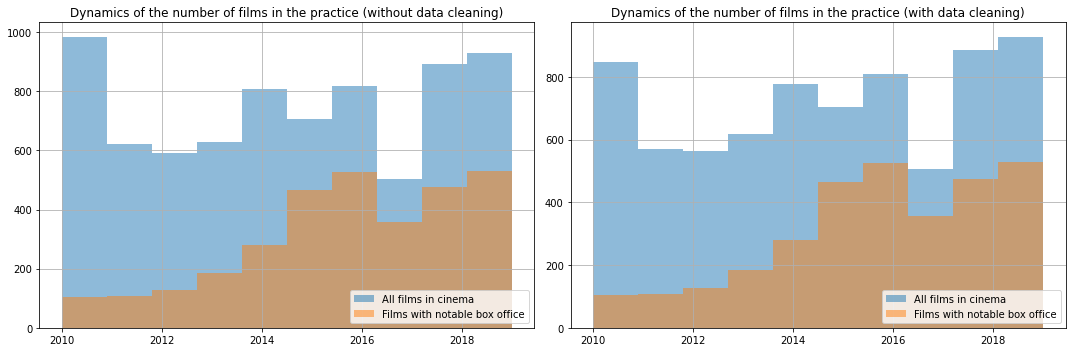

In [78]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axes[0].title.set_text("Dynamics of the number of films in the practice (without data cleaning)")
axes[1].title.set_text("Dynamics of the number of films in the practice (with data cleaning)")

df['year_start'].hist(bins = 10, alpha=0.5, ax = axes[0], label = 'All films in cinema')
df.query('box_office >= 0')['year_start'].hist(bins = 10, alpha=0.5, ax = axes[0], label = 'Films with notable box office')
axes[0].legend(loc ='lower right')

df_clear['year_start'].hist(bins = 10, alpha=0.5, ax = axes[1], label = 'All films in cinema')
df_clear.query('box_office >= 0')['year_start'].hist(bins = 10, alpha=0.5, ax = axes[1], label = 'Films with notable box office')
axes[1].legend(loc ='lower right')

fig.tight_layout()

In [79]:
df_clear['title'].value_counts().to_frame().query('title > 1').reset_index()['title'].sum()

836

In [80]:
df['title'].value_counts().to_frame().query('title > 1').reset_index()['title'].sum()

1272

It can be seen that my method did not help much to clean up the data, in principle it was possible not to drop duplicates and not create a new dataframe.

In [81]:
df_flms_yrs = df.groupby('year_start')['title'].count().to_frame().reset_index()

In [82]:
df_flms_yrs_wth_inf =  df.query('box_office >= 0').groupby('year_start')['title'].count().to_frame().reset_index()

In [83]:
df_flms_yrs = df_flms_yrs.merge(df_flms_yrs_wth_inf, how = 'left', on = 'year_start')

In [84]:
df_flms_yrs.columns = ['year_start', 'cnt_all', 'cnt_wth_inf']

In [85]:
df_flms_yrs['part_wth_info'] = round(df_flms_yrs['cnt_wth_inf']*100/df_flms_yrs['cnt_all'],1)

Let's display the dynamics of the share and number of films in the box office in the form of a table

In [86]:
df_flms_yrs

,year_start,cnt_all,cnt_wth_inf,part_wth_info
0,2010,984,105,10.70
1,2011,622,109,17.50
2,2012,593,128,21.60
3,2013,630,184,29.20
4,2014,807,279,34.60
5,2015,705,465,66.00
6,2016,818,526,64.30
7,2017,505,357,70.70
8,2018,891,475,53.30
9,2019,930,530,57.00


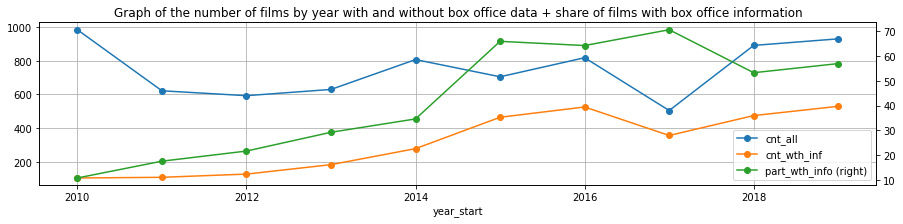

In [87]:
df_flms_yrs.plot(x = 'year_start', y = ['cnt_all', 'cnt_wth_inf', 'part_wth_info'] , style='o-' ,
               grid=True, secondary_y = ['part_wth_info'], 
             figsize=(15, 3)),
plt.title("Graph of the number of films by year with and without box office data + share of films with box office information")
plt.show()

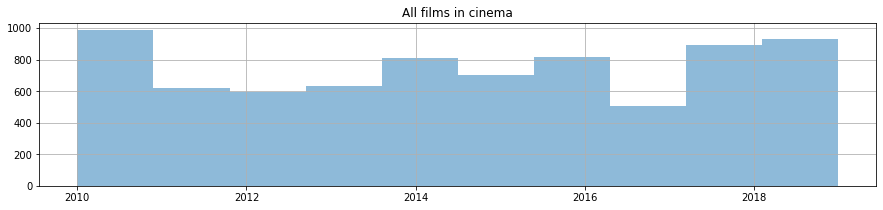

In [88]:
df['year_start'].hist(bins = 10, alpha=0.5, figsize = (15,3))
plt.title("All films in cinema")
plt.show()

- in 2010 the number of rental certificates issued was maximum
- there is a general trend towards a gradual increase in the number of films in the box office from 2011 to 2019
- it can also be seen that the share of films with the specified information about box office is minimal at the beginning of observations (2010) and then grows until 2019

- Study how the dynamics of rental has changed over the years. In which year was the lowest fee? And the maximum?

In [89]:
df_box = df.pivot_table(values = 'box_office', index = 'year_start', 
                aggfunc = 'sum').fillna(0).reset_index()  

In [90]:
df_box

,year_start,box_office
0,2010,2428654
1,2011,14102765
2,2012,6955423
3,2013,29799708
4,2014,7444951857
5,2015,39497365190
6,2016,47866299757
7,2017,48563707218
8,2018,49668403134
9,2019,48425708783


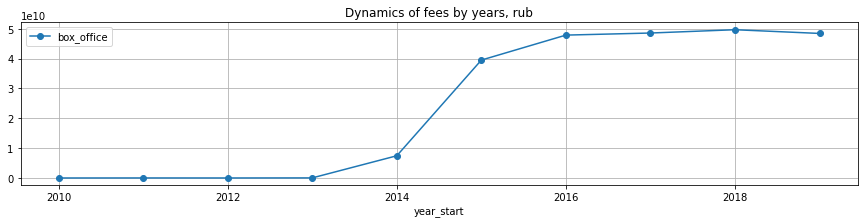

In [91]:
df_box.plot(x = 'year_start', y = 'box_office' , style='o-',  grid = True, figsize=(15, 3))
plt.title("Dynamics of fees by years, rub")
plt.show()

In [93]:
print('Minimum fees' , df_box['box_office'].min(), 'YR', 
    df_box[df_box['box_office'] == df_box['box_office'].min()].iloc[0]['year_start'])
print('Maximum fees' , df_box['box_office'].max(), 'YR',
    df_box[df_box['box_office'] == df_box['box_office'].max()].iloc[0]['year_start'])
     

Minimum fees 2428654 YR 2010
Maximum fees 49668403134 YR 2018


**Conclusion**
- collection volumes began to grow from 2015 (which correlates with the increase in the number of rental certificates in the same period)

- Using the pivot table, calculate the average and median fees for each year.

In this study, I propose to consider in more detail the extreme values of the box_office parameter

In [94]:
df.pivot_table(values = 'box_office', index = 'year_start',
                aggfunc = ['count','mean', 'median']).fillna(0).reset_index()

TypeError: Int64

Detailed by the flag of extreme fees:

In [95]:
df.pivot_table(values = 'box_office', index = 'year_start', columns = 'flg_bd_box_office',
                aggfunc = ['count','mean', 'median']).fillna(0).reset_index() 

TypeError: Int64

**Conclusion**
- average values of volumes up to 2014 - less than 500 thousand rubles. and look implausible with median values even worse - in our data there are a lot of near-zero values for collections, I can assume that the old data is simply not in the min database. culture. for most films released in the period 2010-2014 and it is not rational to consider this period in further analysis
- the flag `flg_bd_box_office`, built earlier on the basis of the range diagram, in `1` shows us films with relatively high box office receipts, in `0` - films with small box office values.

- Determine if the age limit of the audience (“6+”, “12+”, “16+”, “18+”, etc.) affects the box office of the film in the period from 2015 to 2019? Which age-rated films made the most money at the box office? Does the picture change depending on the year? If yes, please suggest what it might be.

In [96]:
df[df['year_start'] >= 2015].groupby('age_restriction')['box_office'].sum().to_frame().\
  sort_values(by = 'box_office', ascending = False)

,box_office
age_restriction,
«16+» - для детей старше 16 лет,76034733646
«12+» - для детей старше 12 лет,60619446629
«6+» - для детей старше 6 лет,55798610801
«18+» - запрещено для детей,40759615577
«0+» - для любой зрительской аудитории,809077429


Consider the dynamics over the years:

In [97]:
age2mny = df[df['year_start'] >= 2014].pivot_table(values = 'box_office', index = 'year_start', columns = 'age_restriction',
                aggfunc = ['sum']).fillna(0).reset_index() 

In [98]:
age2mny.columns = age2mny.columns.droplevel(0)
age2mny = age2mny.rename(columns={'': 'year'})

In [99]:
age2mny

age_restriction,year,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
0,2014,375562258,2584782323,544280086,2209712747,1730614443
1,2015,379054580,13616082007,11368120867,5432308365,8701799371
2,2016,150228851,12204446526,16664548544,6793929825,12053146011
3,2017,229598930,7851427661,18745042900,9651495581,12086142146
4,2018,32449002,14267291657,16503602350,8760085500,10104974625
5,2019,17746066,12680198778,12753418985,10121796306,12852548648


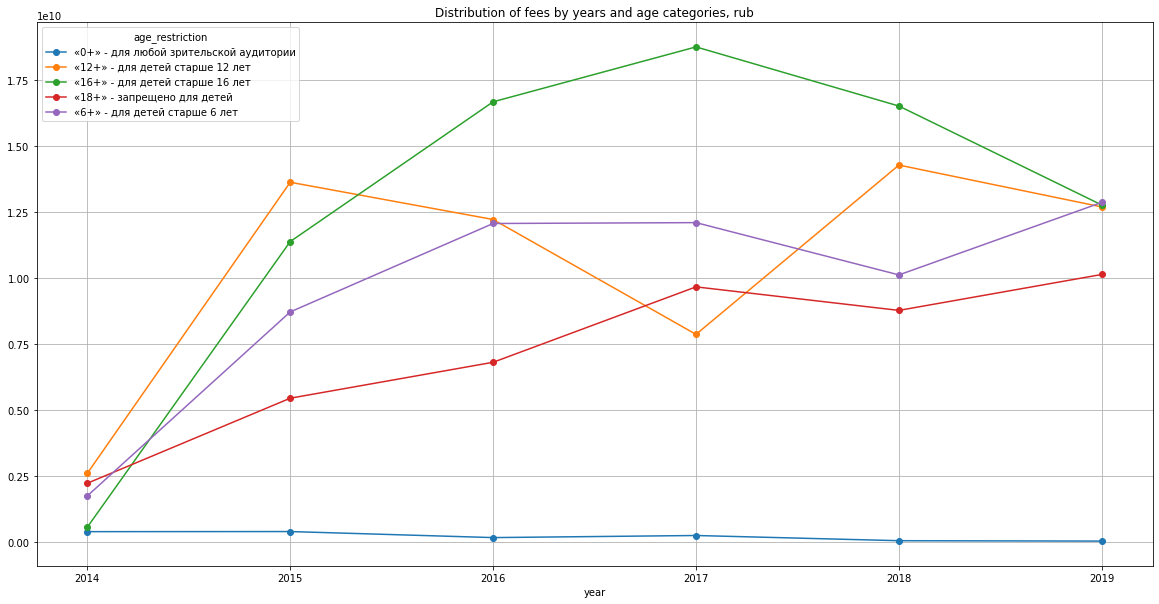

In [100]:
age2mny.plot(x = 'year', y = age2mny.columns[1:] , style='o-',  grid = True, figsize=(20, 10))
plt.title("Distribution of fees by years and age categories, rub")
plt.show()

**Which films win in the 16+ category for 16 and 17 year olds**

In [101]:
df[(df['year_start'] == 2017) & (df['age_restriction'] == '«16+» - для детей старше 16 лет')].\
 sort_values(by = 'box_office', ascending = False)['title'].head(5).to_frame()

,title
3488,Пираты Карибского моря: Мертвецы не рассказыва...
3523,Стражи Галактики. Часть 2
5653,Джуманджи: Зов джунглей
5547,Тор: Рагнарёк
3613,Мумия (2017)


In [102]:
df[(df['year_start'] == 2016) & (df['age_restriction'] == '«16+» - для детей старше 16 лет')].\
 sort_values(by = 'box_office', ascending = False)['title'].head(5).to_frame()

,title
3396,Отряд самоубийц
3318,Доктор Стрэндж
2886,Первый мститель: Противостояние
3661,Дом странных детей мисс Перегрин
3521,Кредо убийцы


**Conclusion**
- the total amount of fees for the period since 2014 is maximum for the category of films `16+`
- it seems logical to me, since `18+` cuts off part of the audience, and most spectacular film blockbusters are `16+`
- Interestingly, the revenue from films in the `16+` category is the largest with a significant margin from other categories, starting from 2016 - this coincides with the start of the release of blockbusters from `Marvel` and other superhero and popular films (Pirates of the Caribbean, etc.)

***Additionally***

If we consider all films for the period 2014 - 2019, we can see:
- the general trend is to increase in all categories of films, except for the `0+` category, these are the most stringent limits and restrictions, films are made for a very small audience and such films rarely get on the big screen
- after `0+`, the complete opposite is `18+`, big film studios don't like this format lately either, and even at the editing stage they cut out the most controversial scenes so as not to fall into this category. The manufacturer's logic here is simple: less audience coverage - less fees.
- category `6+` - this is the so-called. "family movie", dynamics without any surprises, except for the failure in 2018

Next, 2 categories in which the character of the dynamics changed: `12+` and `16+`, above I considered why 16+ took the lead according to the results of the rental of 2016-2017 (these are marvel and other adventure films)

Now you can see why from `2015` to `2017` `12+` sags, and the loan recovers in `2018`, against the backdrop of a decline already `6+`
I propose to look at the dynamics not in money, but in pieces:

In [103]:
age2mny = df[df['year_start'] >= 2014].pivot_table(values = 'box_office', index = 'year_start', columns = 'age_restriction',
                aggfunc = ['count']).fillna(0).reset_index()

In [104]:
age2mny.columns = age2mny.columns.droplevel(0)
age2mny = age2mny.rename(columns={'': 'year'})

In [105]:
age2mny[['year','«6+» - для детей старше 6 лет','«12+» - для детей старше 12 лет','«16+» - для детей старше 16 лет']]

age_restriction,year,«6+» - для детей старше 6 лет,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет
0,2014,30,84,82
1,2015,53,73,168
2,2016,70,82,182
3,2017,45,41,121
4,2018,68,67,156
5,2019,81,85,178


It can be seen that in 2017 the number of films at the box office was the smallest, we know the films that were released and collected the maximum fees, the producers know the same information.
If Suicide Squad, Doctor Strange, The First Avenger (2017 for example) are released in the same year, these films can “skip ahead” so as not to lose profit from their films, but release them later.

What helped `12+` recover in 2018? - again, superhero movies (sequels and sequels) + one film about the war

In [106]:
df[(df['year_start'] == 2018) & (df['age_restriction'] == '«12+» - для детей старше 12 лет')].\
 sort_values(by = 'box_office', ascending = False)['title'].head(5).to_frame()

,title
6548,Т-34
6391,Фантастические твари: Преступления Грин-де-Вальда
5707,Лёд
6500,Аквамен
5895,Мир Юрского периода 2


### Step 4: Research Films That Have Received Government Support

At this stage, there are no specific instructions and tasks - look for interesting patterns in the data. Look at how much money is allocated to support the cinema. Check if such films pay off well, what rating they have.

In [107]:
df_min = df[df['budget'] > 0].reset_index(drop = True)
len(df_min)

315

In [108]:
df_min['budget'] = df_min['budget'].astype('Int64')
df_min['part_gov_help'] = df_min['part_gov_help'].astype('Float64')

In [109]:
df_min['return'] = df_min['box_office']*100/df_min['budget']

The sample is not that big, let's study it more carefully

In [110]:
df_min.pivot_table(values = ['budget','part_gov_help','return','ratings', 'title'], index = 'year_start',
                aggfunc={'budget': np.median,
                         'part_gov_help': np.median,
                         'return': np.median,
                         'ratings': np.median,
                         'title': 'count'
                        }).fillna(0).reset_index() 

TypeError: Int64

In [111]:
df_min.pivot_table(values = ['budget','part_gov_help','return','ratings', 'title'], index = 'year_start',
                aggfunc={'budget': np.mean,
                         'part_gov_help': np.mean,
                         'return': np.mean,
                         'ratings': np.mean,
                         'title': 'count'
                        }).fillna(0).reset_index() 

TypeError: Int64

In [112]:
df_min[(df_min['return'] > 100) & (df_min['year_start'] >= 2017) & (df_min['year_start'] <= 2018)]\
     .sort_values(by = 'return', ascending = False)[['title','year_start','budget','box_office', 'return']].head(10)

,title,year_start,budget,box_office,return
200,Лёд,2018,148585222,1445731798,973.00
204,Я худею,2018,87649127,633462267,722.73
192,Ёлки Новые,2017,174381922,855451052,490.56
233,Непрощенный,2018,82496889,393279629,476.72
194,Движение вверх,2017,590192191,2779686144,470.98
180,Последний богатырь,2017,352477575,1655037688,469.54
195,Три богатыря и принцесса Египта,2017,174464395,759226773,435.18
245,Т-34,2018,563784717,2271754005,402.95
244,Ёлки Последние,2018,179708770,701507030,390.36
202,О чем говорят мужчины. Продолжение,2018,109609029,389818769,355.64


In [113]:
df_min['main_genre'].value_counts().to_frame().head(3)

,main_genre
драма,92
комедия,68
мультфильм,26


In [114]:
df_min['age_restriction'].value_counts().to_frame().head(3)

,age_restriction
«16+» - для детей старше 16 лет,118
«12+» - для детей старше 12 лет,103
«6+» - для детей старше 6 лет,59


**From state support:**

In [115]:
df_min.pivot_table(values = ['ratings'], index = 'year_start',
                aggfunc={
                         'ratings': np.median,
                    
                        }).fillna(0).reset_index() 

,year_start,ratings
0,2013,6.70
1,2014,6.35
2,2015,6.20
3,2016,5.90
4,2017,6.20
5,2018,6.30
6,2019,6.15


**Russian-made film without support for the same period:**

In [116]:
df[(df['production_country'] == 'Россия') & (df['budget'].isna() == True) & (df['year_start'] >= 2013)]\
.pivot_table(values = ['ratings'], index = 'year_start',
                aggfunc={
                         'ratings': np.median,
                         
                        }).fillna(0).reset_index() 

,year_start,ratings
0,2013,5.85
1,2014,6.30
2,2015,5.65
3,2016,6.30
4,2017,6.05
5,2018,6.50
6,2019,6.60


**Conclusion**
- total films from the state. participation in our sample of 315 pieces
- the peak of rental certificates - 2015, this year cannot be called successful for such films, with a state participation share of more than 60%, on average, films were only able to fight back by 5%
- Film budgets are growing every year, while ratings and state. participation remains about the same (more state funds are spent on films with an average rating of 6.0)
- the most popular genres for state-supported films are drama, comedy, cartoon
- the most popular age category - 16 and 18+
- in 2017 and 2018, there were super successful films with refunds - Ice, I'm losing weight, New Christmas trees, Unforgiven, Moving up
- state support does not help much to improve the ratings of domestic films

### Step 5. General conclusion

- as part of the task, an array of data on distribution certificates and box office films for the period 2010 - 2019 was studied
- data preprocessing was performed, which included:
    - gap analysis
    - search for duplicates
    - changing data types to more logical ones
    - categorical and quantitative values were analyzed separately
- further additional columns were set:
    - in order to simplify work with categorical data
    - for the purpose of further analysis of films from the state. participation
- in the research part was considered:
    - the dynamics of the release of films in distribution (with information about the box office and without it)
    - estimated average fees (arithmetic mean and median)
    - dependence of revenue on the age category of the film
- additionally, the pool of films that received the state. financing

More detailed findings are presented in each chapter.